In [2]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.7 MB/s eta 0:00:00


Shape: (1, 2434, 607)
Testing Shape: 1


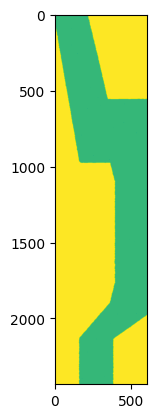

Shape: (1, 2435, 607)
Testing Shape: 1


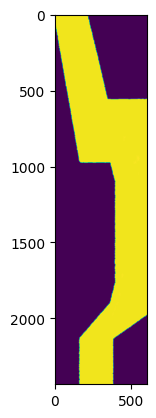

In [ ]:
import rasterio
from rasterio.plot import show

# File paths of the three magnetic images
image_paths = [
    "/content/drive/MyDrive/IITB/Magntic_Image/data/Dep_NonDepFinal.tif",
    "/content/drive/MyDrive/IITB/Magntic_Image/data/MagneticImage.tif"
]
# Open and display the magnetic images
for image_path in image_paths:
    # Open the image using rasterio
    dataset = rasterio.open(image_path)

    # Read all the bands from the image
    bands = dataset.read()

    # Get the shape of the bands
    shape = bands.shape

    # Print the shape of the bands
    print("Shape:", shape)

    # Print the shape of the bands
    print("Testing Shape:", shape[0])

    # Display the image using rasterio's show() function
    show(bands)

    # Close the dataset
    dataset.close()

Data shape: (144, 1, 100, 100)
Labels shape: (144, 100, 100)


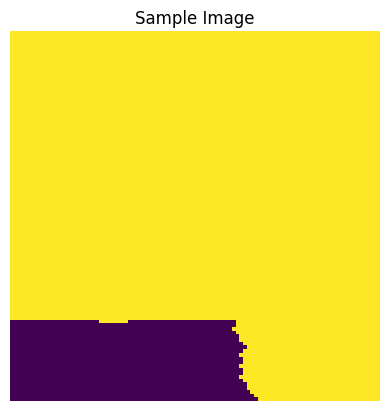

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# File paths of the magnetic and label images
magnetic_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/MagneticImage.tif"
label_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/Dep_NonDepFinal.tif"

# Patch size
patch_size = 100

# Open the magnetic image using rasterio
with rasterio.open(magnetic_image_path) as magnetic_dataset:
    # Read the magnetic image as a numpy array
    magnetic_image = magnetic_dataset.read()

# Open the label image using rasterio
with rasterio.open(label_image_path) as label_dataset:
    # Read the label image as a numpy array
    label_image = label_dataset.read(1)  # Assuming label is in the first band

    # Calculate the number of patches in each dimension
    num_patches_h = label_image.shape[0] // patch_size
    num_patches_w = label_image.shape[1] // patch_size

    # Create empty lists to store the data and labels
    data = []
    labels = []

    # Iterate over each patch in the magnetic image
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            # Get the patch from the magnetic image
            patch = magnetic_image[:, i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Get the corresponding label from the label image
            label = label_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Process the label to 0 for non-deposit, 1 for deposit, and 2 for unknown/unexplored
            label = np.where(label == 0, 0, np.where(label == 1, 1, 2))

            # Append the patch and label to the data and labels lists
            data.append(patch)
            labels.append(label)

    # Convert the data and labels lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

# Print the shapes of data and labels arrays
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


# Display a random sample from the data array
index = np.random.randint(data.shape[0])
sample = data[index]

# Plot the sample as an image
plt.imshow(np.squeeze(sample.transpose(1, 2, 0)))
plt.axis('off')
plt.title('Sample Image')
plt.show()


In [ ]:
import numpy as np
import rasterio
import tensorflow as tf
import matplotlib.pyplot as plt

# File paths of the magnetic and label images
magnetic_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/MagneticImage.tif"
label_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/Dep_NonDepFinal.tif"

# Patch size
patch_size = 100

# Open the magnetic image using rasterio
with rasterio.open(magnetic_image_path) as magnetic_dataset:
    # Read the magnetic image as a numpy array
    magnetic_image = magnetic_dataset.read()

# Open the label image using rasterio
with rasterio.open(label_image_path) as label_dataset:
    # Read the label image as a numpy array
    label_image = label_dataset.read(1)  # Assuming label is in the first band

    # Calculate the number of patches in each dimension
    num_patches_h = label_image.shape[0] // patch_size
    num_patches_w = label_image.shape[1] // patch_size

    # Create empty lists to store the data and labels
    data = []
    labels = []

    # Iterate over each patch in the magnetic image
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            # Get the patch from the magnetic image
            patch = magnetic_image[:, i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Get the corresponding label from the label image
            label = label_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Process the label to 0 for non-deposit, 1 for deposit, and 2 for unknown/unexplored
            label = np.where(label == 0, 0, np.where(label == 1, 1, 2))

            # Append the patch and label to the data and labels lists
            data.append(patch)
            labels.append(label)

    # Convert the data and labels lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

(1, 100, 100)


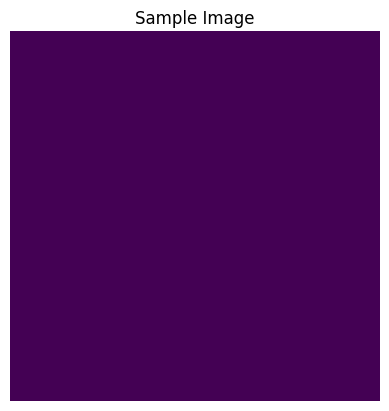

In [ ]:
# Display a random sample from the data array
index = np.random.randint(data.shape[0])
sample = data[index]

print(sample.shape)
# Plot the sample as an image
plt.imshow(np.squeeze(sample.transpose(1, 2, 0)))
plt.axis('off')
plt.title('Sample Image')
plt.show()


In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model, load_model

In [ ]:
# File paths of the magnetic and label images
magnetic_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/MagneticImage.tif"
label_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/Dep_NonDepFinal.tif"

# Patch size
patch_size = 100

# Open the magnetic image using rasterio
with rasterio.open(magnetic_image_path) as magnetic_dataset:
    # Read the magnetic image as a numpy array
    magnetic_image = magnetic_dataset.read()

# Open the label image using rasterio
with rasterio.open(label_image_path) as label_dataset:
    # Read the label image as a numpy array
    label_image = label_dataset.read(1)  # Assuming label is in the first band

    # Calculate the number of patches in each dimension
    num_patches_h = label_image.shape[0] // patch_size
    num_patches_w = label_image.shape[1] // patch_size

    # Create empty lists to store the data and labels
    data = []
    labels = []

    # Iterate over each patch in the magnetic image
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            # Get the patch from the magnetic image
            patch = magnetic_image[:, i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Get the corresponding label from the label image
            label = label_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Process the label to 0 for non-deposit, 1 for deposit, and 2 for unknown/unexplored
            label = np.where(label == 0, 0, np.where(label == 1, 1, 2))

            # Append the patch and label to the data and labels lists
            data.append(patch)
            labels.append(label)

    # Convert the data and labels lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

# Normalize the data
data = data / 255.0

# Reshape the data array to match the input shape of the model
data = np.reshape(data, (-1, patch_size, patch_size, 1))

# Create the autoencoder model
input_shape = (patch_size, patch_size, magnetic_image.shape[0])
input_layer = Input(shape=input_shape)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(magnetic_image.shape[0], (3, 3), activation='sigmoid', padding='same')(decoded)
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data,
                epochs=20,
                batch_size=32,
                validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 8s 1s/step - loss: -510564.4375 - val_loss: -1529496.3750
Epoch 2/20
4/4 [==============================] - 4s 955ms/step - loss: -2127214.2500 - val_loss: -4324888.0000
Epoch 3/20
4/4 [==============================] - 4s 949ms/step - loss: -5550282.5000 - val_loss: -9634220.0000
Epoch 4/20
4/4 [==============================] - 6s 2s/step - loss: -11823901.0000 - val_loss: -19485938.0000
Epoch 5/20
4/4 [==============================] - 4s 940ms/step - loss: -22818052.0000 - val_loss: -37732948.0000
Epoch 6/20
4/4 [==============================] - 4s 954ms/step - loss: -44116016.0000 - val_loss: -71329176.0000
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: -85962928.0000 - val_loss: -131933712.0000
Epoch 8/20
4/4 [==============================] - 4s 949ms/step - loss: -152938112.0000 - val_loss: -243737024.0000
Epoch 9/20
4/4 [==============================] - 4s 929ms/step - loss: -284375712.0000 - val_loss: -

In [ ]:
# Save the trained model
model_path = "/content/drive/MyDrive/IITB/Magntic_Image/model/autoencoder_model.h5"
autoencoder.save(model_path)
print("Model saved.")

Model saved.


In [ ]:
# Load the saved model
loaded_model = load_model(model_path)
print("Model loaded.")

Model loaded.


In [ ]:
# Reshape the data for layer-wise representation
data_reshaped = np.reshape(data, (-1, patch_size, patch_size, magnetic_image.shape[0]))

# Get the layer-wise representations
layer_outputs = [layer.output for layer in loaded_model.layers[1:4]]
activation_model = Model(inputs=loaded_model.input, outputs=layer_outputs)
features = activation_model.predict(data_reshaped)

# Reshape and stitch the layer-wise representations
stitched_images = []
for i, feature in enumerate(features):
    feature = feature.transpose(0, 3, 1, 2)  # Reshape to (num_samples, num_channels, height, width)
    stitched_image = np.zeros((label_image.shape[0], label_image.shape[1], feature.shape[1]))
    for h in range(num_patches_h):
        for w in range(num_patches_w):
            patch_feature = feature[h * num_patches_w + w]
            patch_feature = patch_feature.reshape((1, patch_feature.shape[0], patch_feature.shape[1], patch_feature.shape[2]))
            patch_feature = patch_feature.transpose(0, 2, 3, 1)  # Reshape to (1, height, width, num_channels)
            stitched_image[h * patch_size:(h + 1) * patch_size, w * patch_size:(w + 1) * patch_size, :] = patch_feature
    stitched_images.append(stitched_image)

5/5 [==============================] - 1s 201ms/step


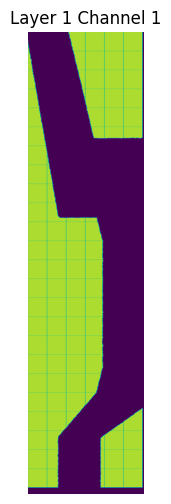

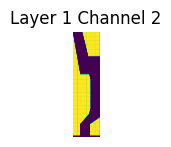

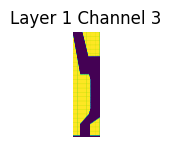

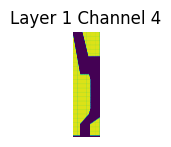

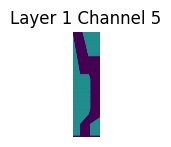

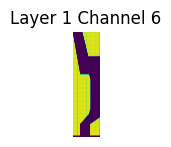

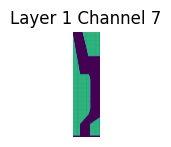

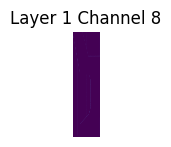

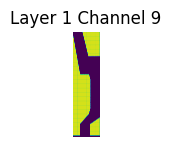

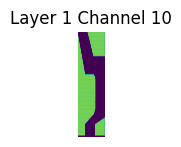

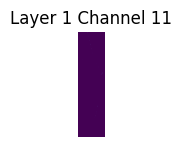

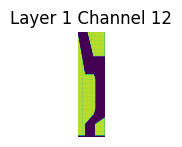

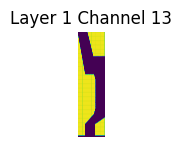

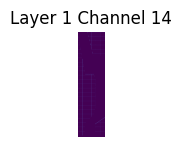

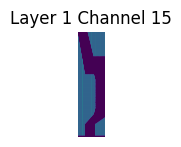

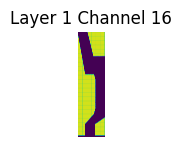

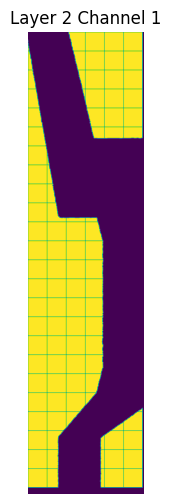

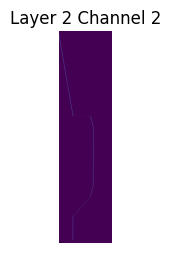

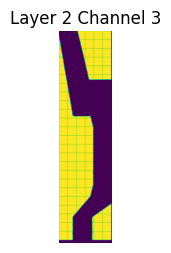

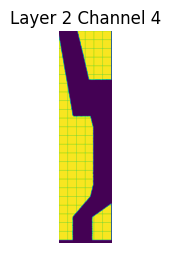

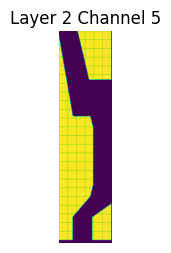

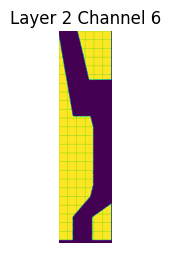

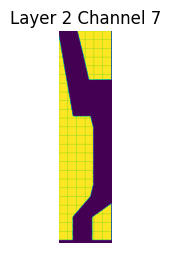

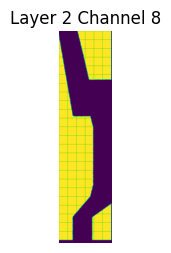

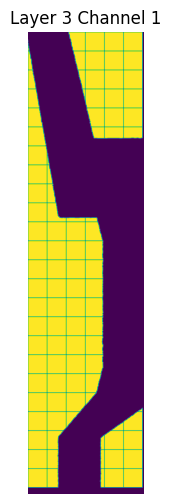

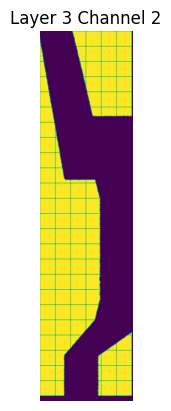

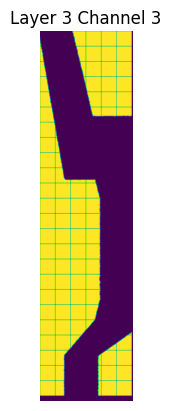

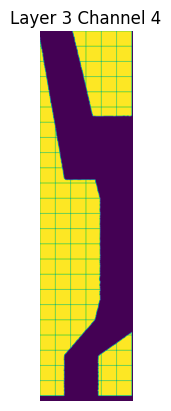

In [ ]:
import os

# Directory to save the images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/stiched_outputs"
os.makedirs(save_dir, exist_ok=True)

# Save the individual layer-wise representation images
for i, stitched_image in enumerate(stitched_images):
    plt.figure(figsize=(40, 6))  # Set the figsize as per your preference
    for j in range(stitched_image.shape[2]):
        plt.subplot(1, stitched_image.shape[2], j+1)
        plt.imshow(stitched_image[:,:,j])
        plt.title(f"Layer {i+1} Channel {j+1}")
        plt.axis('off')

        # Save the image
        save_path = os.path.join(save_dir, f"Layer_{i+1}_Channel_{j+1}.png")
        plt.savefig(save_path, bbox_inches='tight')
        # Display the image
        plt.show()

        plt.close()  # Close the figure to release memory

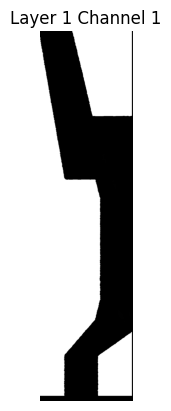

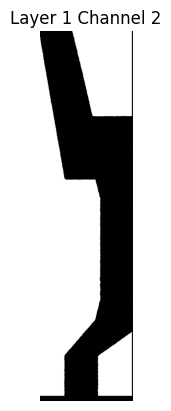

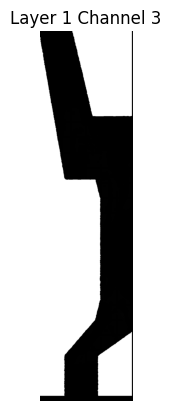

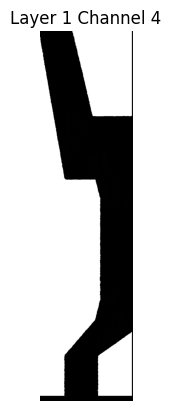

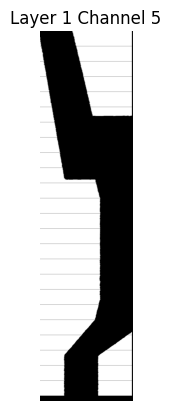

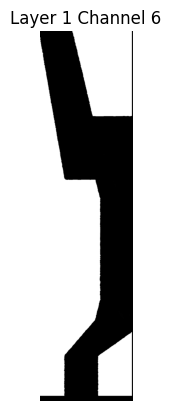

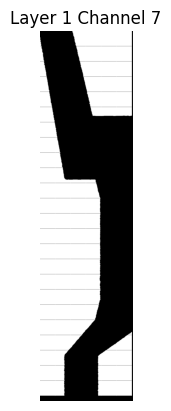

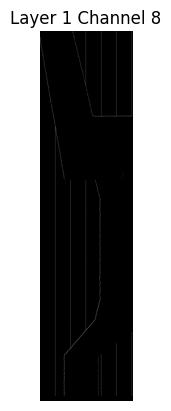

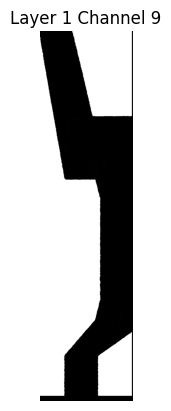

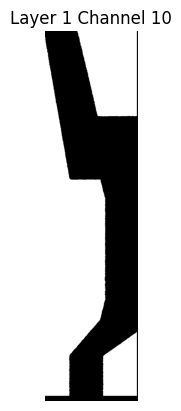

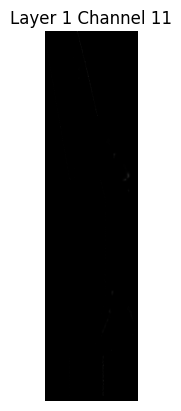

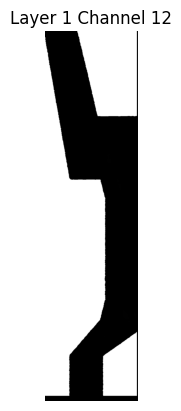

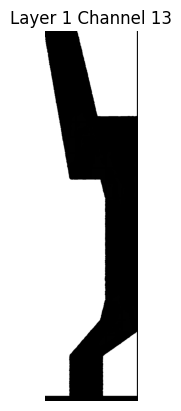

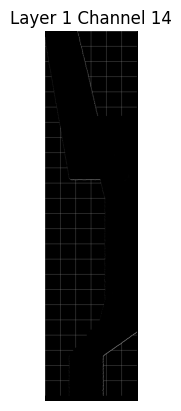

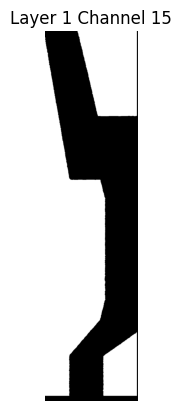

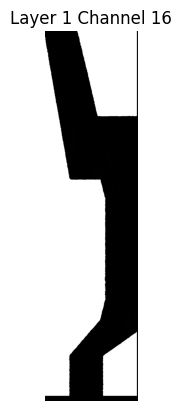

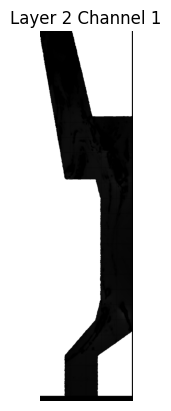

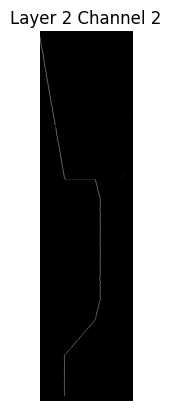

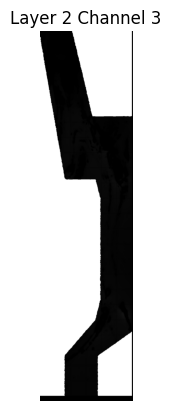

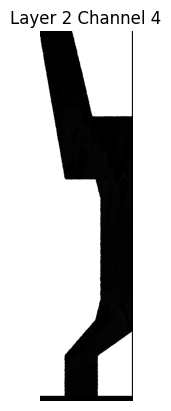

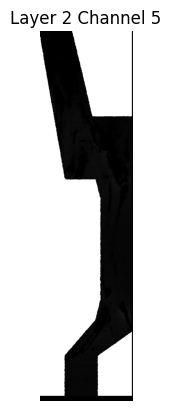

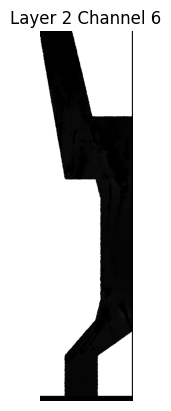

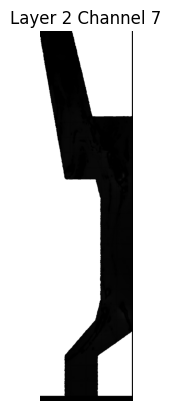

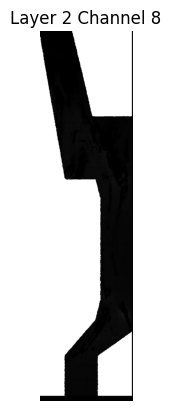

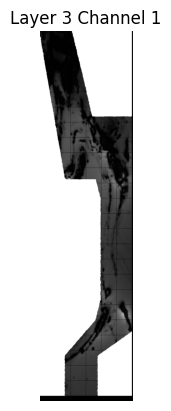

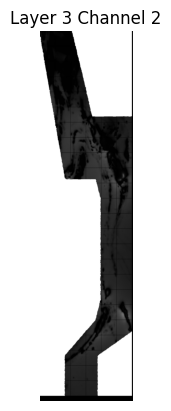

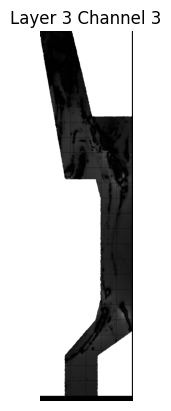

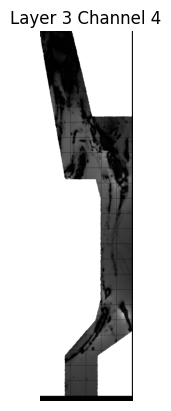

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory to save the images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/stiched_outputs"
os.makedirs(save_dir, exist_ok=True)

# Save and display the individual layer-wise representation images
for i, stitched_image in enumerate(stitched_images):
    for j in range(stitched_image.shape[2]):
        # Create a PIL image from the NumPy array
        img = Image.fromarray(stitched_image[:, :, j])

        # Convert the image to RGB mode
        img = img.convert('RGB')

        # Display the image
        plt.imshow(img)
        plt.title(f"Layer {i+1} Channel {j+1}")
        plt.axis('off')
        plt.show()

        # Save the image
        save_path = os.path.join(save_dir, f"Layer_{i+1}_Channel_{j+1}.png")
        img.save(save_path)


# For patch size of 50

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model, load_model

In [ ]:
# File paths of the magnetic and label images
magnetic_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/MagneticImage.tif"
label_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/Dep_NonDepFinal.tif"

# Patch size
patch_size = 50

# Open the magnetic image using rasterio
with rasterio.open(magnetic_image_path) as magnetic_dataset:
    # Read the magnetic image as a numpy array
    magnetic_image = magnetic_dataset.read()

# Open the label image using rasterio
with rasterio.open(label_image_path) as label_dataset:
    # Read the label image as a numpy array
    label_image = label_dataset.read(1)  # Assuming label is in the first band

    # Calculate the number of patches in each dimension
    num_patches_h = label_image.shape[0] // patch_size
    num_patches_w = label_image.shape[1] // patch_size

    # Create empty lists to store the data and labels
    data = []
    labels = []

    # Iterate over each patch in the magnetic image
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            # Get the patch from the magnetic image
            patch = magnetic_image[:, i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Get the corresponding label from the label image
            label = label_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Process the label to 0 for non-deposit, 1 for deposit, and 2 for unknown/unexplored
            label = np.where(label == 0, 0, np.where(label == 1, 1, 2))

            # Append the patch and label to the data and labels lists
            data.append(patch)
            labels.append(label)

    # Convert the data and labels lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

# Normalize the data
data = data / 255.0

# Reshape the data array to match the input shape of the model
data = np.reshape(data, (-1, patch_size, patch_size, 1))

# Create the autoencoder model
input_shape = (patch_size, patch_size, magnetic_image.shape[0])
input_layer = Input(shape=input_shape)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(magnetic_image.shape[0], (3, 3), activation='sigmoid', padding='same')(decoded)
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data,
                epochs=20,
                batch_size=32,
                validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 6s 288ms/step - loss: 35930.9180 - val_loss: -11180.6875
Epoch 2/20
15/15 [==============================] - 4s 270ms/step - loss: -1545917.1250 - val_loss: -8493707.0000
Epoch 3/20
15/15 [==============================] - 7s 500ms/step - loss: -41048844.0000 - val_loss: -176098864.0000
Epoch 4/20
15/15 [==============================] - 4s 293ms/step - loss: -664811456.0000 - val_loss: -2189120256.0000
Epoch 5/20
15/15 [==============================] - 6s 377ms/step - loss: -7283435008.0000 - val_loss: -23691055104.0000
Epoch 6/20
15/15 [==============================] - 6s 371ms/step - loss: -64123510784.0000 - val_loss: -169133883392.0000
Epoch 7/20
15/15 [==============================] - 4s 278ms/step - loss: -383728484352.0000 - val_loss: -875665358848.0000
Epoch 8/20
15/15 [==============================] - 4s 284ms/step - loss: -1694826758144.0000 - val_loss: -3569530699776.0000
Epoch 9/20
15/15 [=============================

In [ ]:
# Save the trained model
model_path = "/content/drive/MyDrive/IITB/Magntic_Image/model/v2_autoencoder_model.h5"
autoencoder.save(model_path)
print("Model saved.")

Model saved.


In [ ]:
# Load the saved model
loaded_model = load_model(model_path)
print("Model loaded.")

Model loaded.


In [ ]:
# Reshape the data for layer-wise representation
data_reshaped = np.reshape(data, (-1, patch_size, patch_size, magnetic_image.shape[0]))

# Get the layer-wise representations
layer_outputs = [layer.output for layer in loaded_model.layers[1:4]]
activation_model = Model(inputs=loaded_model.input, outputs=layer_outputs)
features = activation_model.predict(data_reshaped)

# Reshape and stitch the layer-wise representations
stitched_images = []
for i, feature in enumerate(features):
    feature = feature.transpose(0, 3, 1, 2)  # Reshape to (num_samples, num_channels, height, width)
    stitched_image = np.zeros((label_image.shape[0], label_image.shape[1], feature.shape[1]))
    for h in range(num_patches_h):
        for w in range(num_patches_w):
            patch_feature = feature[h * num_patches_w + w]
            patch_feature = patch_feature.reshape((1, patch_feature.shape[0], patch_feature.shape[1], patch_feature.shape[2]))
            patch_feature = patch_feature.transpose(0, 2, 3, 1)  # Reshape to (1, height, width, num_channels)
            stitched_image[h * patch_size:(h + 1) * patch_size, w * patch_size:(w + 1) * patch_size, :] = patch_feature
    stitched_images.append(stitched_image)

18/18 [==============================] - 1s 35ms/step


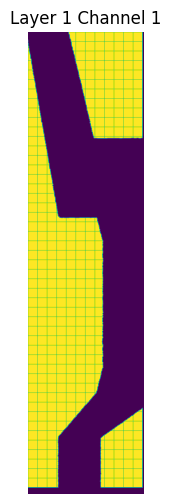

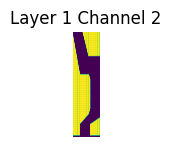

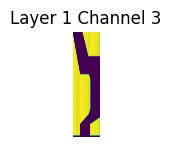

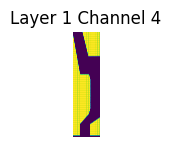

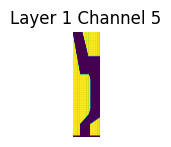

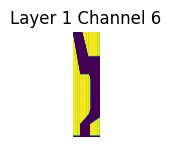

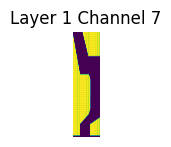

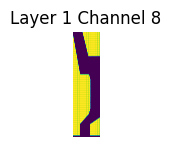

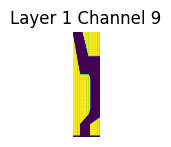

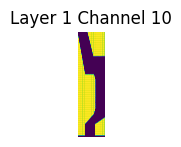

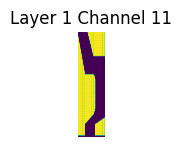

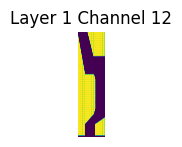

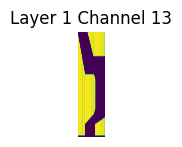

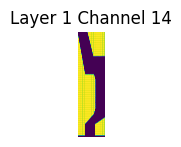

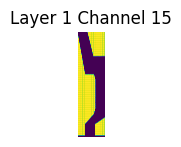

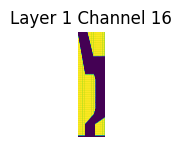

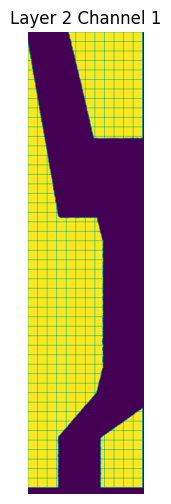

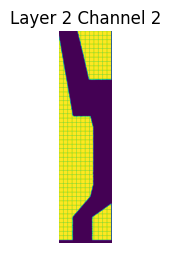

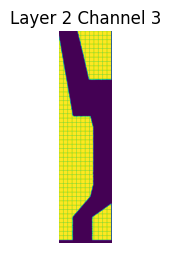

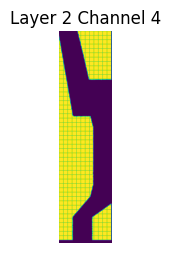

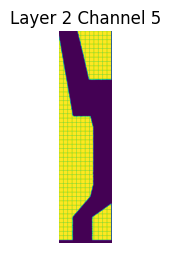

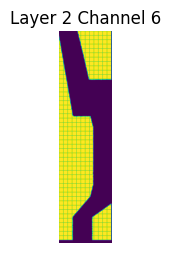

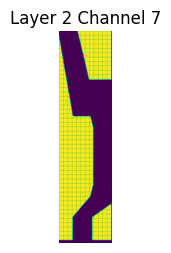

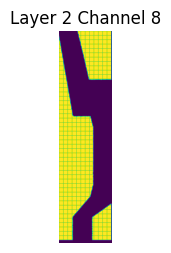

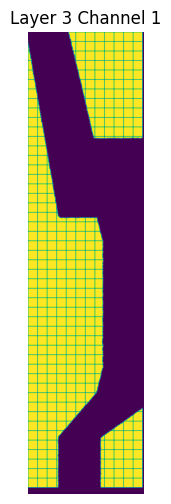

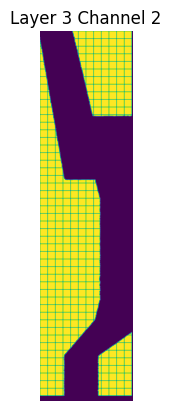

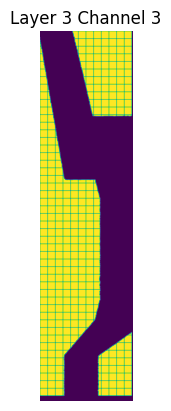

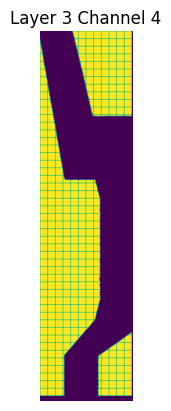

In [ ]:
import os

# Directory to save the images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/50x50_stiched_outputs"
os.makedirs(save_dir, exist_ok=True)

# Save the individual layer-wise representation images
for i, stitched_image in enumerate(stitched_images):
    plt.figure(figsize=(40, 6))  # Set the figsize as per your preference
    for j in range(stitched_image.shape[2]):
        plt.subplot(1, stitched_image.shape[2], j+1)
        plt.imshow(stitched_image[:,:,j])
        plt.title(f"Layer {i+1} Channel {j+1}")
        plt.axis('off')

        # Save the image
        save_path = os.path.join(save_dir, f"Layer_{i+1}_Channel_{j+1}.png")
        plt.savefig(save_path, bbox_inches='tight')

        # Display the image
        plt.show()

        plt.close()  # Close the figure to release memory


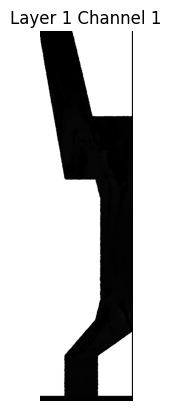

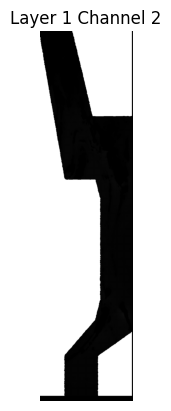

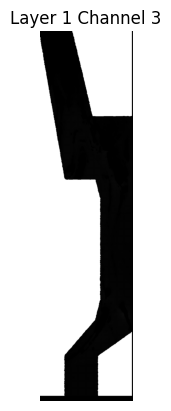

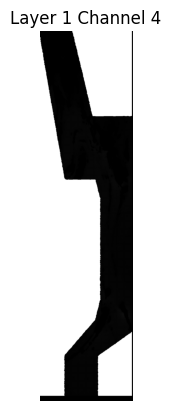

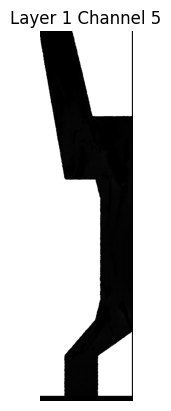

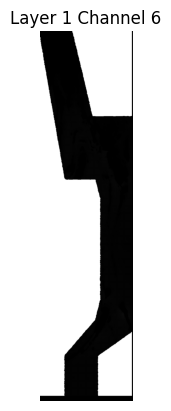

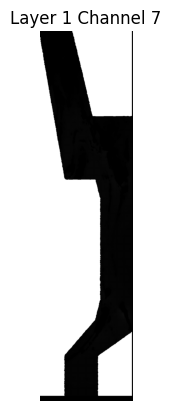

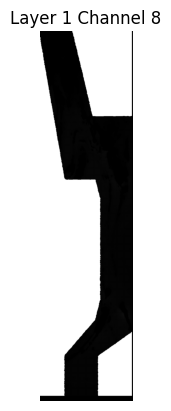

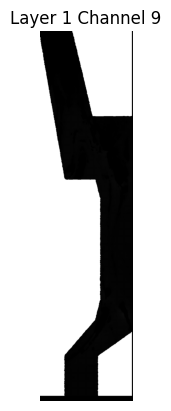

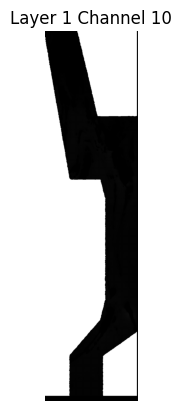

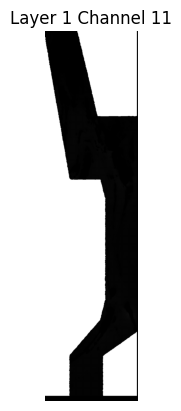

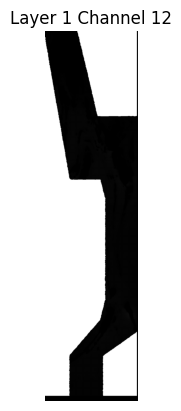

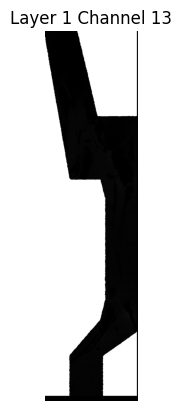

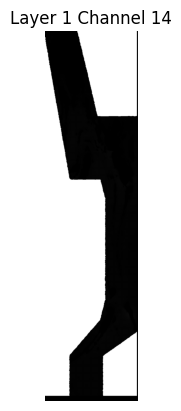

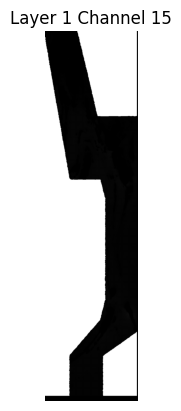

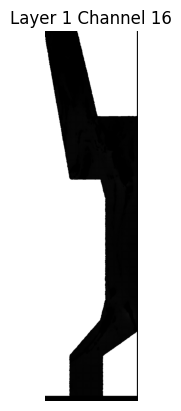

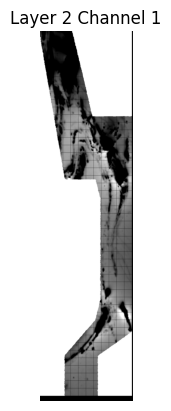

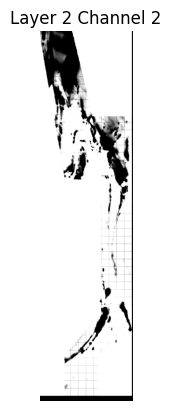

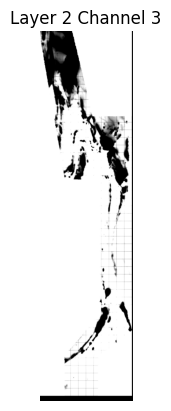

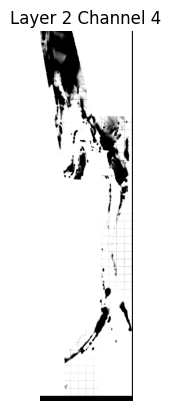

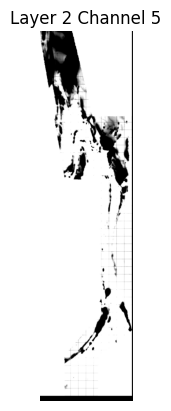

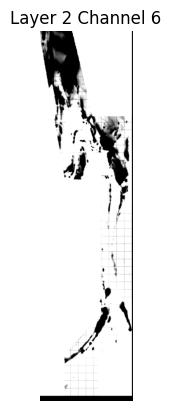

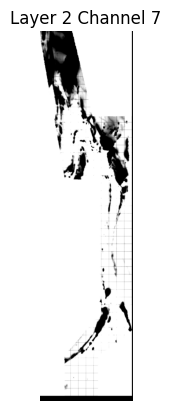

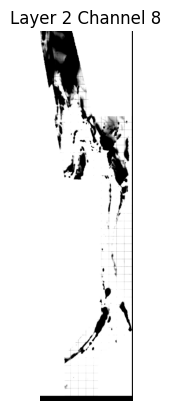

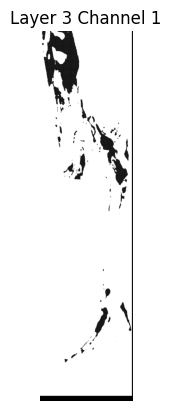

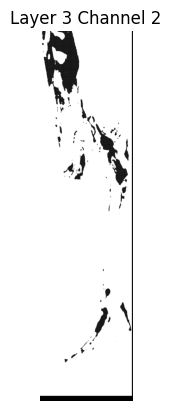

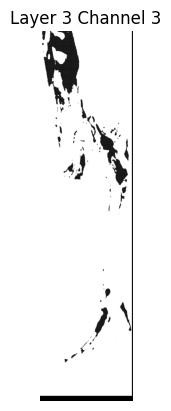

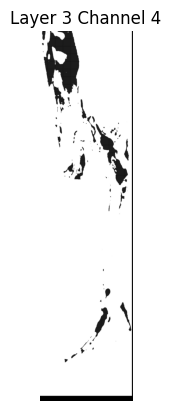

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory to save the images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/new_50x50_stiched_outputs"
os.makedirs(save_dir, exist_ok=True)

# Save and display the individual layer-wise representation images
for i, stitched_image in enumerate(stitched_images):

    for j in range(stitched_image.shape[2]):
        # Create a PIL image from the NumPy array
        img = Image.fromarray(stitched_image[:, :, j])

        # Convert the image to RGB mode
        img = img.convert('RGB')

        # Display the image
        plt.imshow(img)
        plt.title(f"Layer {i+1} Channel {j+1}")
        plt.axis('off')
        plt.show()

        # Save the image
        save_path = os.path.join(save_dir, f"Layer_{i+1}_Channel_{j+1}.png")
        img.save(save_path)


#Remove the outer layer and pad with the outer layer for patch 50x50

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model, load_model

In [ ]:
# File paths of the magnetic and label images
magnetic_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/MagneticImage.tif"
label_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/Dep_NonDepFinal.tif"

# Patch size
patch_size = 50

# Open the magnetic image using rasterio
with rasterio.open(magnetic_image_path) as magnetic_dataset:
    # Read the magnetic image as a numpy array
    magnetic_image = magnetic_dataset.read()

# Open the label image using rasterio
with rasterio.open(label_image_path) as label_dataset:
    # Read the label image as a numpy array
    label_image = label_dataset.read(1)  # Assuming label is in the first band

    # Calculate the number of patches in each dimension
    num_patches_h = label_image.shape[0] // patch_size
    num_patches_w = label_image.shape[1] // patch_size

    # Create empty lists to store the data and labels
    data = []
    labels = []

    # Iterate over each patch in the magnetic image
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            # Get the patch from the magnetic image
            patch = magnetic_image[:, i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Get the corresponding label from the label image
            label = label_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Process the label to 0 for non-deposit, 1 for deposit, and 2 for unknown/unexplored
            label = np.where(label == 0, 0, np.where(label == 1, 1, 2))

            # Append the patch and label to the data and labels lists
            data.append(patch)
            labels.append(label)

    # Convert the data and labels lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

# Normalize the data
data = data / 255.0

# Reshape the data array to match the input shape of the model
data = np.reshape(data, (-1, patch_size, patch_size, 1))

# Create the autoencoder model
input_shape = (patch_size, patch_size, magnetic_image.shape[0])
input_layer = Input(shape=input_shape)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(magnetic_image.shape[0], (3, 3), activation='sigmoid', padding='same')(decoded)
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data,
                epochs=20,
                batch_size=32,
                validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 8s 418ms/step - loss: -31215.7715 - val_loss: -1375929.5000
Epoch 2/20
15/15 [==============================] - 4s 292ms/step - loss: -11825513.0000 - val_loss: -50195888.0000
Epoch 3/20
15/15 [==============================] - 5s 310ms/step - loss: -208139152.0000 - val_loss: -712163328.0000
Epoch 4/20
15/15 [==============================] - 6s 393ms/step - loss: -2378788096.0000 - val_loss: -6827359232.0000
Epoch 5/20
15/15 [==============================] - 4s 270ms/step - loss: -18087651328.0000 - val_loss: -49283428352.0000
Epoch 6/20
15/15 [==============================] - 4s 271ms/step - loss: -115656826880.0000 - val_loss: -275141296128.0000
Epoch 7/20
15/15 [==============================] - 6s 428ms/step - loss: -552514682880.0000 - val_loss: -1195685183488.0000
Epoch 8/20
15/15 [==============================] - 4s 267ms/step - loss: -2145152139264.0000 - val_loss: -4256276676608.0000
Epoch 9/20
15/15 [===================

In [ ]:
# Save the trained model
model_path = "/content/drive/MyDrive/IITB/Magntic_Image/model/padding_v2_autoencoder_model.h5"
autoencoder.save(model_path)
print("Model saved.")

Model saved.


In [ ]:
# Load the saved model
loaded_model = load_model(model_path)
print("Model loaded.")

Model loaded.


In [ ]:
# Reshape the data for layer-wise representation
data_reshaped = np.reshape(data, (-1, patch_size, patch_size, magnetic_image.shape[0]))

# Get the layer-wise representations
layer_outputs = [layer.output for layer in loaded_model.layers[1:4]]
activation_model = Model(inputs=loaded_model.input, outputs=layer_outputs)
features = activation_model.predict(data_reshaped)

# Reshape and stitch the layer-wise representations
stitched_images = []
for i, feature in enumerate(features):
    feature = feature.transpose(0, 3, 1, 2)  # Reshape to (num_samples, num_channels, height, width)
    stitched_image = np.zeros((label_image.shape[0], label_image.shape[1], feature.shape[1]))
    for h in range(num_patches_h):
        for w in range(num_patches_w):
            patch_feature = feature[h * num_patches_w + w]
            patch_feature = patch_feature.reshape((1, patch_feature.shape[0], patch_feature.shape[1], patch_feature.shape[2]))
            patch_feature = patch_feature.transpose(0, 2, 3, 1)  # Reshape to (1, height, width, num_channels)
            # Remove the outer layer in all four sides
            inner_patch_feature = patch_feature[:, 1:-1, 1:-1, :]
            # Pad all four sides with the copy of the inner layer
            padded_patch_feature = np.pad(inner_patch_feature, ((0, 0), (1, 1), (1, 1), (0, 0)), mode='edge')
            stitched_image[h * patch_size:(h + 1) * patch_size, w * patch_size:(w + 1) * patch_size, :] = padded_patch_feature
    stitched_images.append(stitched_image)


18/18 [==============================] - 2s 105ms/step


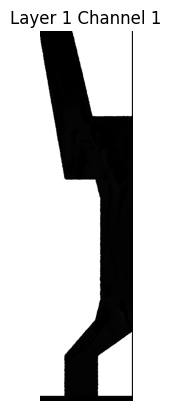

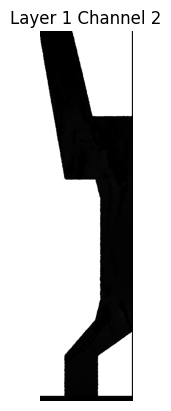

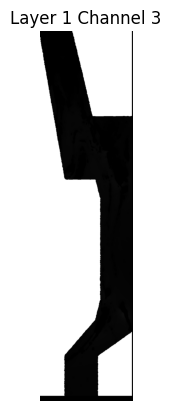

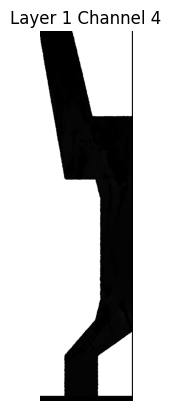

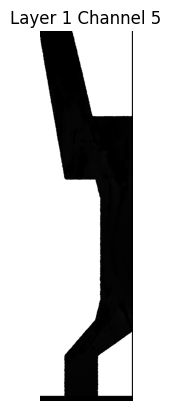

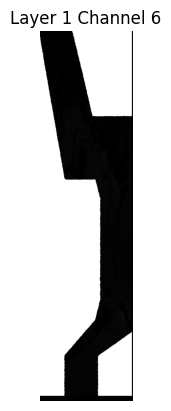

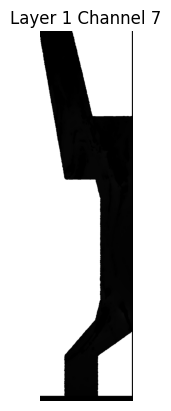

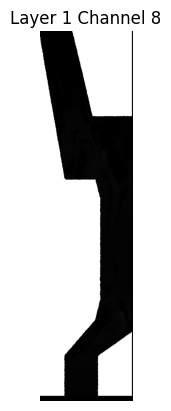

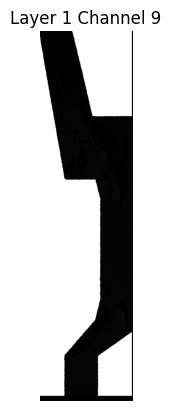

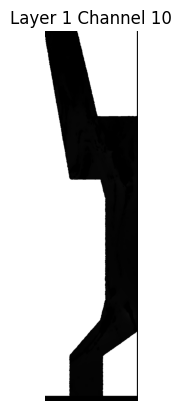

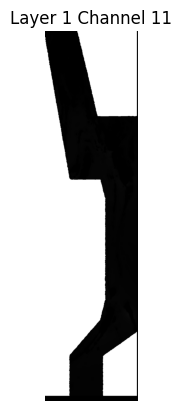

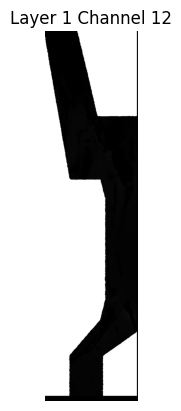

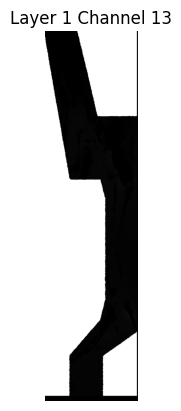

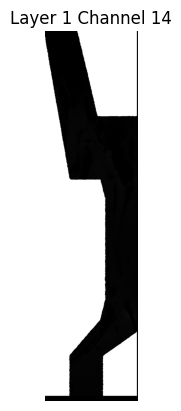

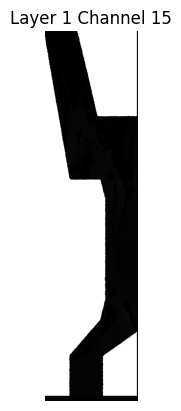

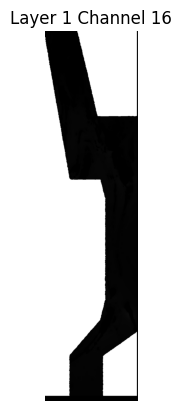

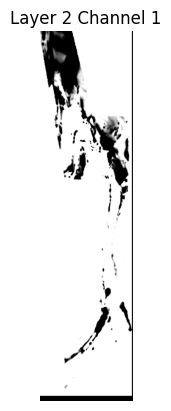

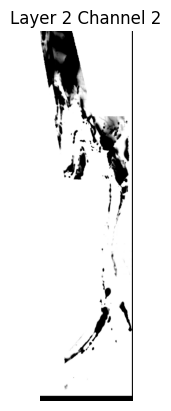

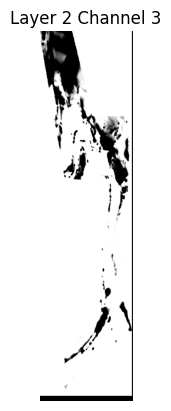

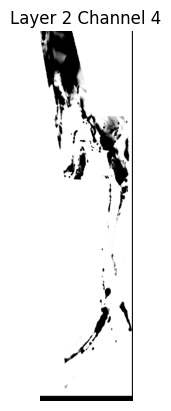

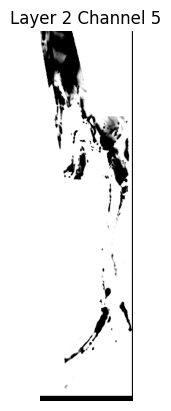

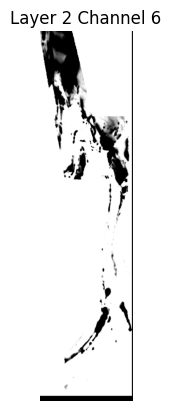

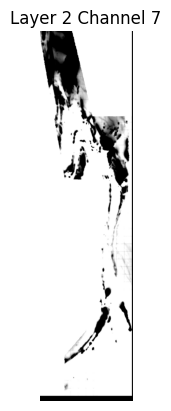

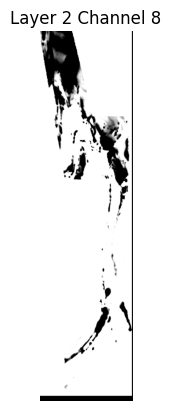

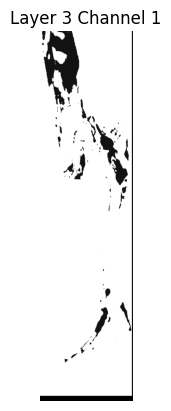

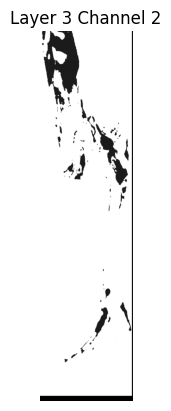

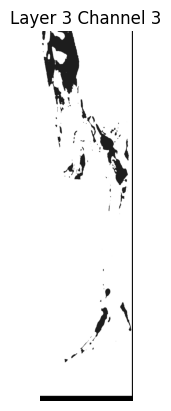

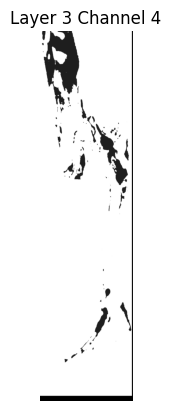

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory to save the images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/padding_new_50x50_stiched_outputs"
os.makedirs(save_dir, exist_ok=True)

# Save and display the individual layer-wise representation images
for i, stitched_image in enumerate(stitched_images):

    for j in range(stitched_image.shape[2]):
        # Create a PIL image from the NumPy array
        img = Image.fromarray(stitched_image[:, :, j])

        # Convert the image to RGB mode
        img = img.convert('RGB')

        # Display the image
        plt.imshow(img)
        plt.title(f"Layer {i+1} Channel {j+1}")
        plt.axis('off')
        plt.show()

        # Save the image
        save_path = os.path.join(save_dir, f"Layer_{i+1}_Channel_{j+1}.png")
        img.save(save_path)


Display filters at each layer.

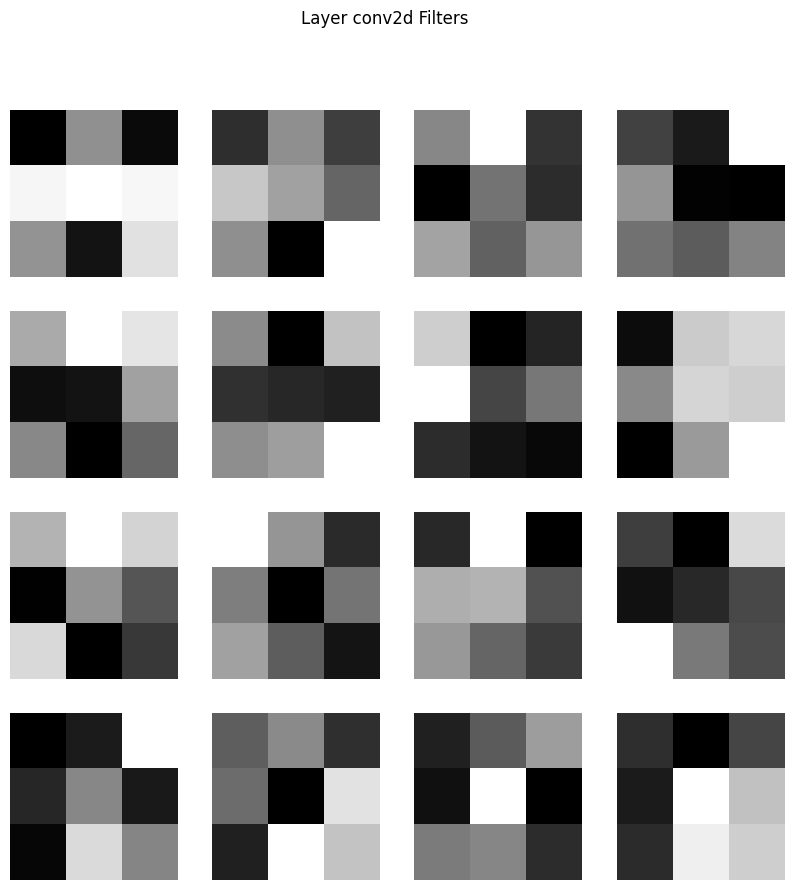

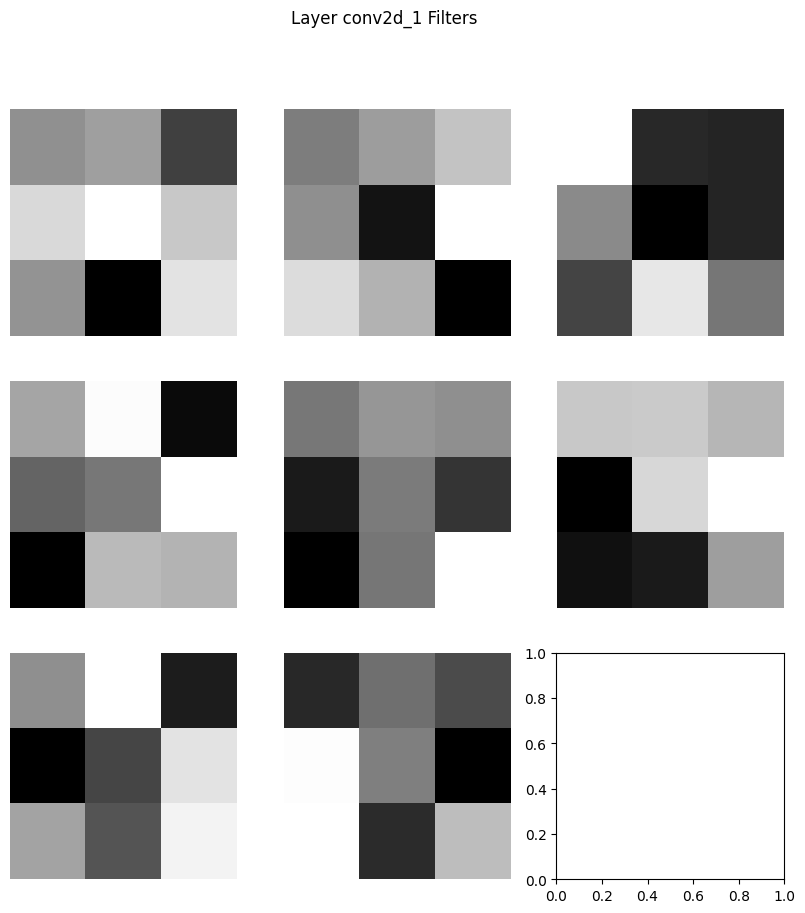

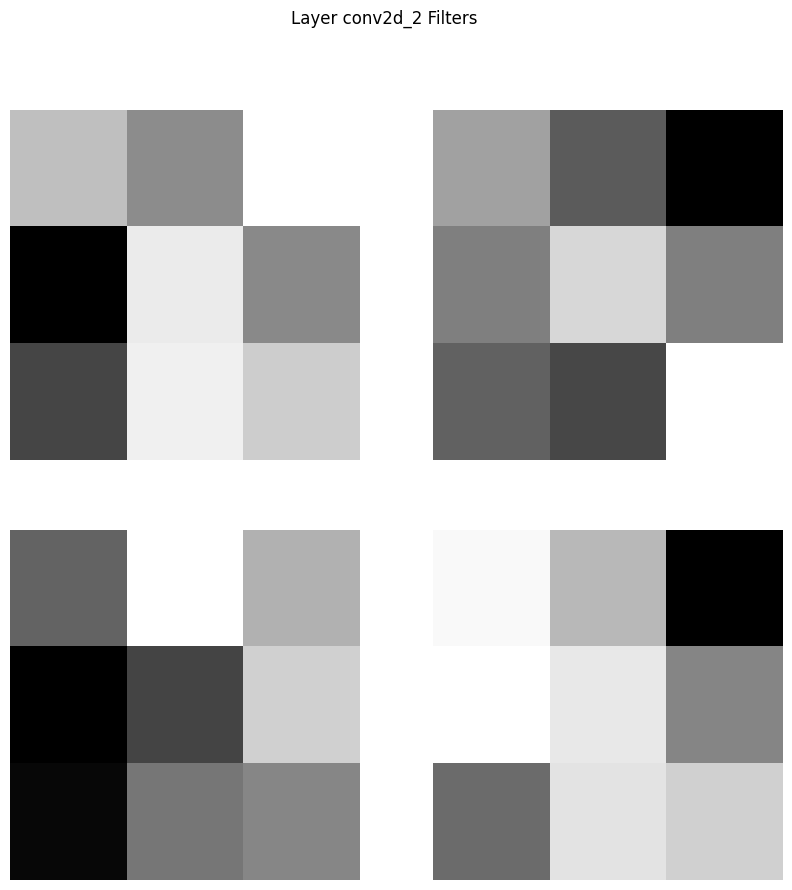

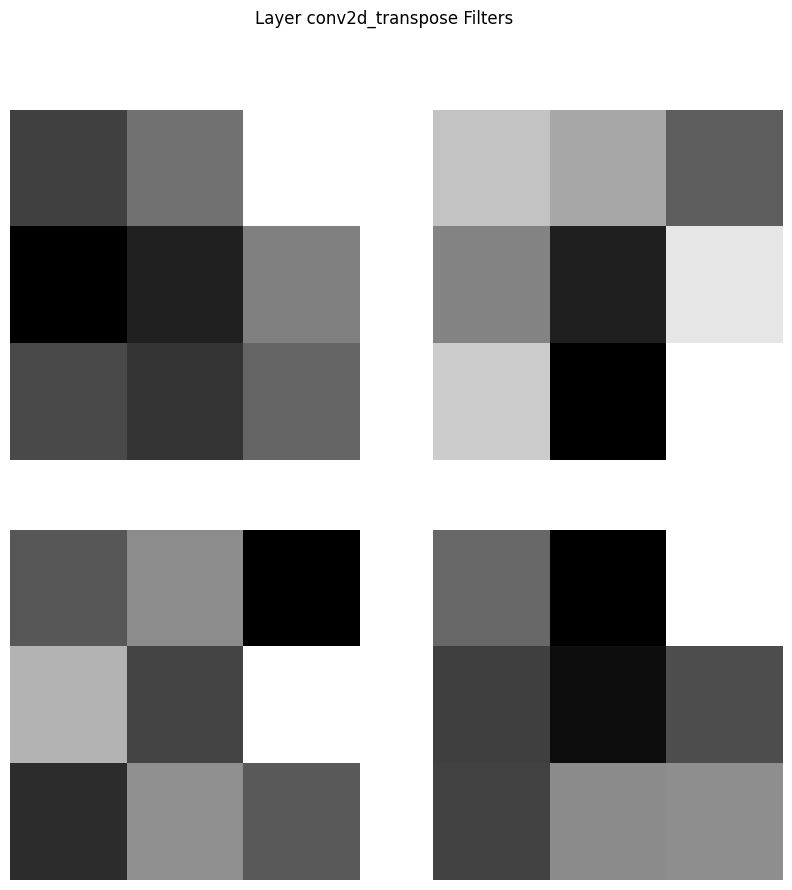

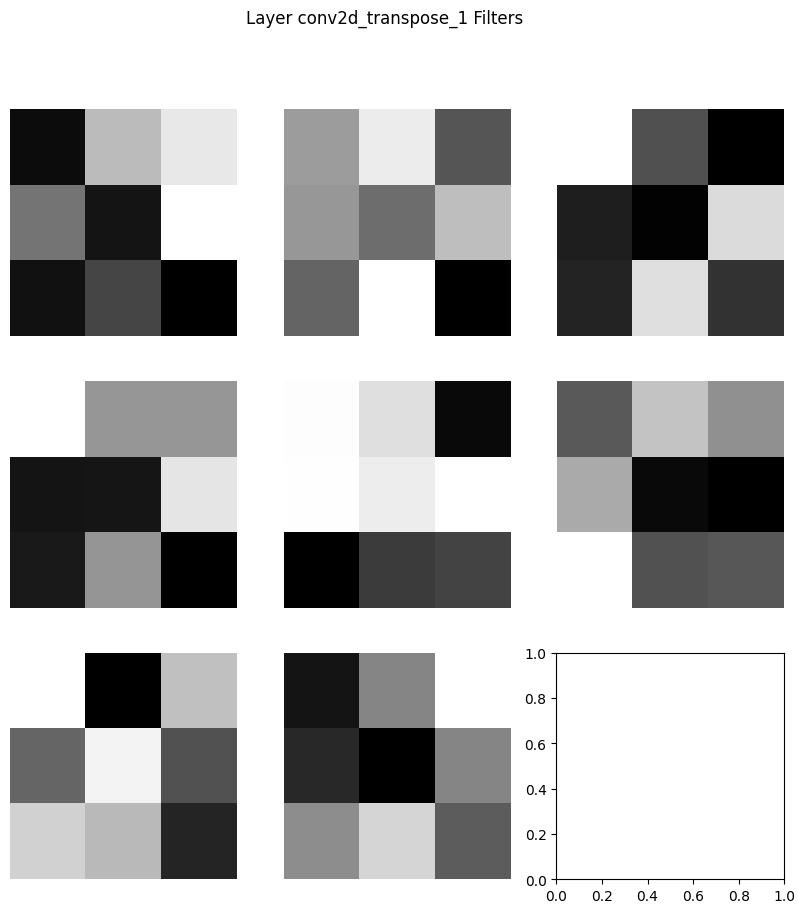

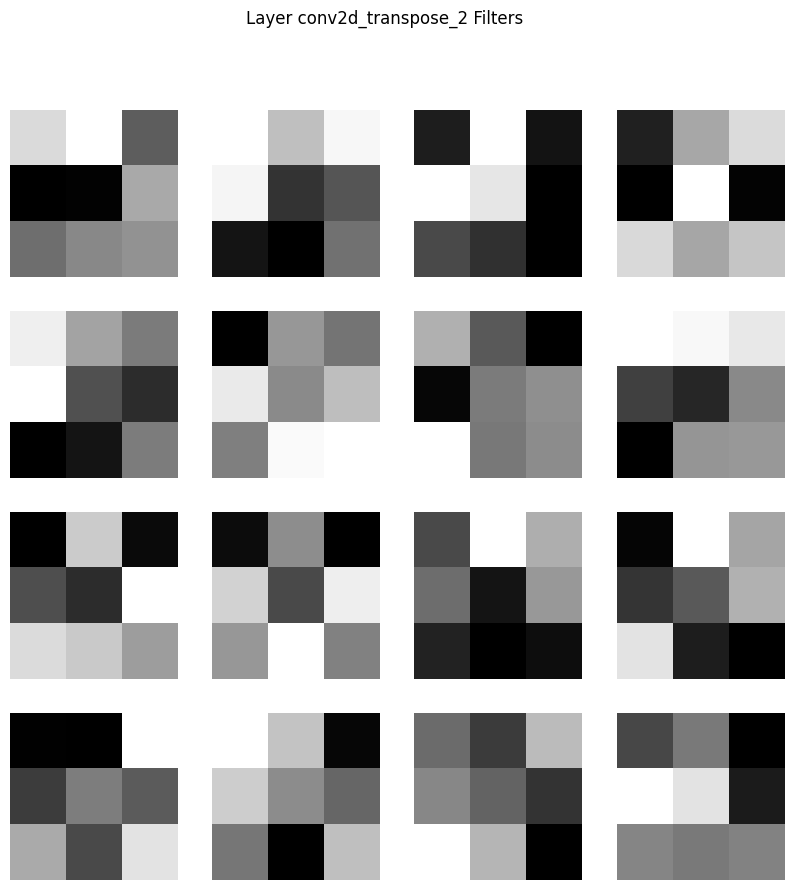

In [17]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Directory to save the filter images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/filter_images"
os.makedirs(save_dir, exist_ok=True)

# Load the saved model
model_path = "/content/drive/MyDrive/IITB/Magntic_Image/model/padding_v2_autoencoder_model.h5"
loaded_model = load_model(model_path)

# Display and save the filters at each layer
for layer in loaded_model.layers:
    if hasattr(layer, 'filters'):
        filters = layer.get_weights()[0]
        num_filters = filters.shape[3]
        filter_size = filters.shape[0]

        # Create a grid to display the filters
        grid_size = int(np.ceil(np.sqrt(num_filters)))
        fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))

        # Display each filter in the grid
        for i in range(num_filters):
            row = i // grid_size
            col = i % grid_size
            axs[row, col].imshow(filters[:, :, 0, i], cmap='gray')
            axs[row, col].axis('off')

        plt.suptitle(f"Layer {layer.name} Filters")
        plt.savefig(os.path.join(save_dir, f"Layer_{layer.name}_Filters.png"), bbox_inches='tight')
        plt.show()
        plt.close()


#50x50 patch size for 11x11 filter size

In [10]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model, load_model

In [11]:
# File paths of the magnetic and label images
magnetic_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/MagneticImage.tif"
label_image_path = "/content/drive/MyDrive/IITB/Magntic_Image/data/Dep_NonDepFinal.tif"

# Patch size
patch_size = 50

# Open the magnetic image using rasterio
with rasterio.open(magnetic_image_path) as magnetic_dataset:
    # Read the magnetic image as a numpy array
    magnetic_image = magnetic_dataset.read()

# Open the label image using rasterio
with rasterio.open(label_image_path) as label_dataset:
    # Read the label image as a numpy array
    label_image = label_dataset.read(1)  # Assuming label is in the first band

    # Calculate the number of patches in each dimension
    num_patches_h = label_image.shape[0] // patch_size
    num_patches_w = label_image.shape[1] // patch_size

    # Create empty lists to store the data and labels
    data = []
    labels = []

    # Iterate over each patch in the magnetic image
    for i in range(num_patches_h):
        for j in range(num_patches_w):
            # Get the patch from the magnetic image
            patch = magnetic_image[:, i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Get the corresponding label from the label image
            label = label_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size]

            # Process the label to 0 for non-deposit, 1 for deposit, and 2 for unknown/unexplored
            label = np.where(label == 0, 0, np.where(label == 1, 1, 2))

            # Append the patch and label to the data and labels lists
            data.append(patch)
            labels.append(label)

    # Convert the data and labels lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

# Normalize the data
data = data / 255.0

# Reshape the data array to match the input shape of the model
data = np.reshape(data, (-1, patch_size, patch_size, 1))

# Create the autoencoder model
input_shape = (patch_size, patch_size, magnetic_image.shape[0])
input_layer = Input(shape=input_shape)
encoded = Conv2D(16, (11, 11), activation='relu', padding='same')(input_layer)
encoded = Conv2D(8, (11, 11), activation='relu', padding='same')(encoded)
encoded = Conv2D(4, (11, 11), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(8, (11, 11), activation='relu', padding='same')(encoded)
decoded = Conv2DTranspose(16, (11, 11), activation='relu', padding='same')(decoded)
decoded = Conv2DTranspose(magnetic_image.shape[0], (11, 11), activation='sigmoid', padding='same')(decoded)
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data,
                epochs=20,
                batch_size=32,
                validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 49s 3s/step - loss: -64248786944.0000 - val_loss: -998255230976.0000
Epoch 2/20
15/15 [==============================] - 48s 3s/step - loss: -29074430885888.0000 - val_loss: -210812379594752.0000
Epoch 3/20
15/15 [==============================] - 49s 3s/step - loss: -1592225846788096.0000 - val_loss: -7025265658036224.0000
Epoch 4/20
15/15 [==============================] - 46s 3s/step - loss: -30316864177438720.0000 - val_loss: -95215568071688192.0000
Epoch 5/20
15/15 [==============================] - 46s 3s/step - loss: -282261316503076864.0000 - val_loss: -736654305070678016.0000
Epoch 6/20
15/15 [==============================] - 46s 3s/step - loss: -1674837271762698240.0000 - val_loss: -3896444633588170752.0000
Epoch 7/20
15/15 [==============================] - 46s 3s/step - loss: -7524129042929287168.0000 - val_loss: -15731077896451653632.0000
Epoch 8/20
15/15 [==============================] - 47s 3s/step - loss: -2658796797

In [12]:
# Save the trained model
model_path = "/content/drive/MyDrive/IITB/Magntic_Image/model/11x11_padding_v2_autoencoder_model.h5"
autoencoder.save(model_path)
print("Model saved.")

Model saved.


In [13]:
# Load the saved model
loaded_model = load_model(model_path)
print("Model loaded.")

Model loaded.


In [14]:
# Reshape the data for layer-wise representation
data_reshaped = np.reshape(data, (-1, patch_size, patch_size, magnetic_image.shape[0]))

# Get the layer-wise representations
layer_outputs = [layer.output for layer in loaded_model.layers[1:4]]
activation_model = Model(inputs=loaded_model.input, outputs=layer_outputs)
features = activation_model.predict(data_reshaped)

# Reshape and stitch the layer-wise representations
stitched_images = []
for i, feature in enumerate(features):
    feature = feature.transpose(0, 3, 1, 2)  # Reshape to (num_samples, num_channels, height, width)
    stitched_image = np.zeros((label_image.shape[0], label_image.shape[1], feature.shape[1]))
    for h in range(num_patches_h):
        for w in range(num_patches_w):
            patch_feature = feature[h * num_patches_w + w]
            patch_feature = patch_feature.reshape((1, patch_feature.shape[0], patch_feature.shape[1], patch_feature.shape[2]))
            patch_feature = patch_feature.transpose(0, 2, 3, 1)  # Reshape to (1, height, width, num_channels)
            # Remove the outer layer in all four sides
            inner_patch_feature = patch_feature[:, 1:-1, 1:-1, :]
            # Pad all four sides with the copy of the inner layer
            padded_patch_feature = np.pad(inner_patch_feature, ((0, 0), (1, 1), (1, 1), (0, 0)), mode='edge')
            stitched_image[h * patch_size:(h + 1) * patch_size, w * patch_size:(w + 1) * patch_size, :] = padded_patch_feature
    stitched_images.append(stitched_image)


18/18 [==============================] - 5s 251ms/step


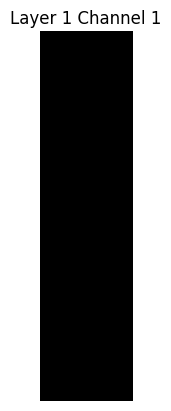

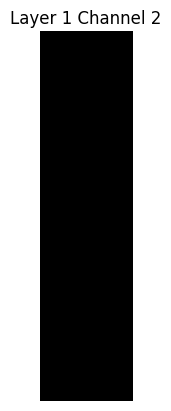

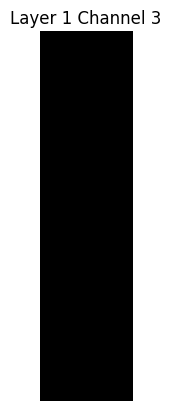

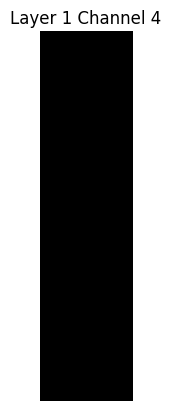

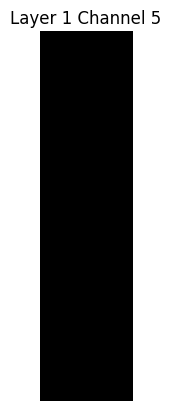

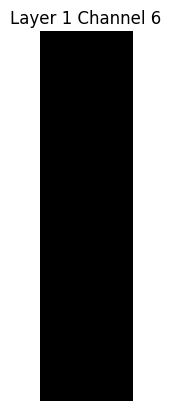

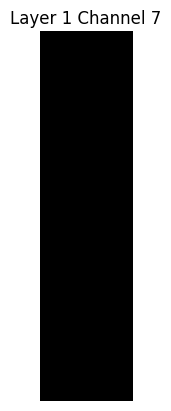

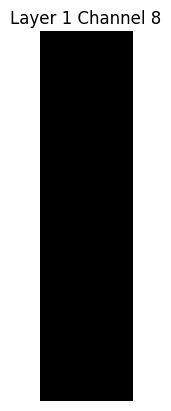

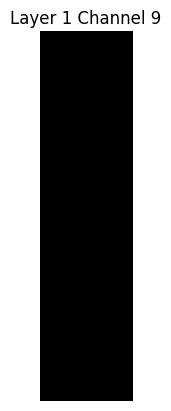

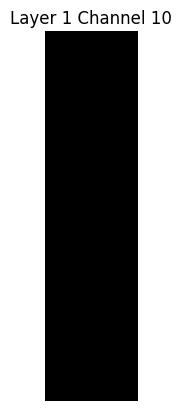

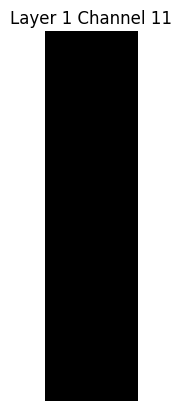

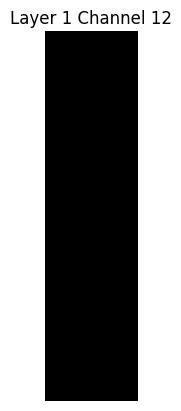

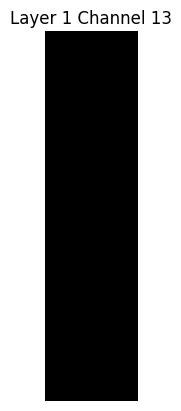

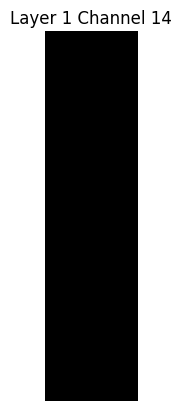

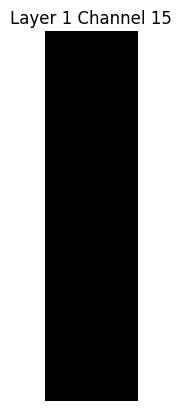

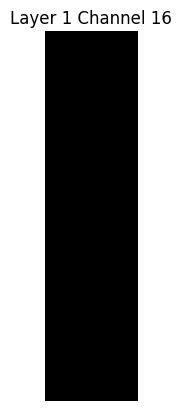

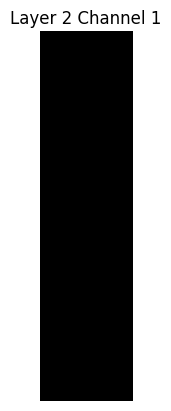

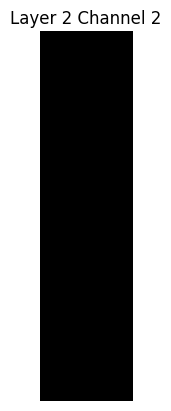

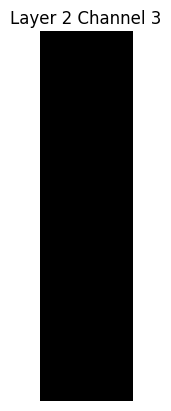

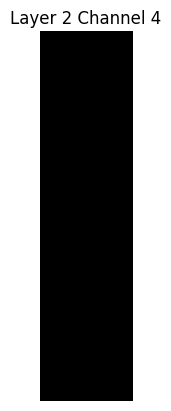

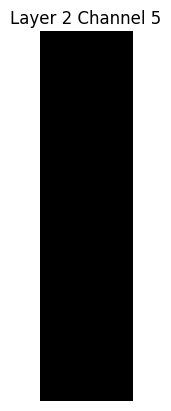

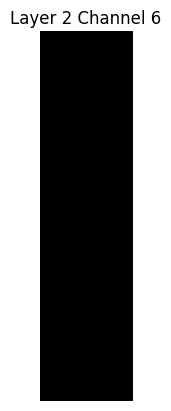

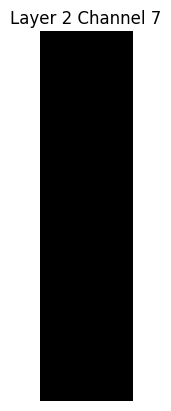

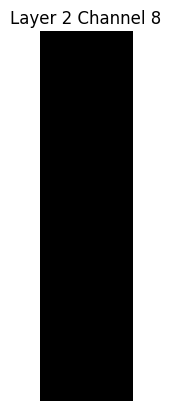

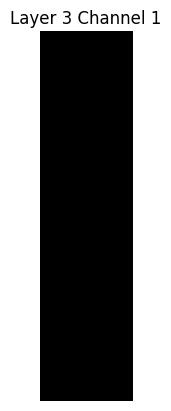

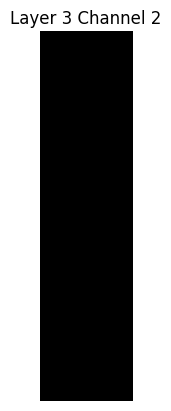

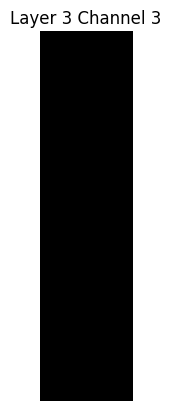

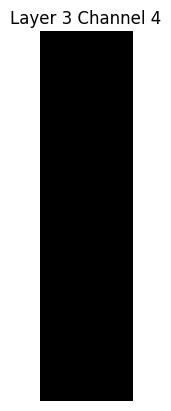

In [15]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory to save the images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/11x11_padding_new_50x50_stiched_outputs"
os.makedirs(save_dir, exist_ok=True)

# Save and display the individual layer-wise representation images
for i, stitched_image in enumerate(stitched_images):

    for j in range(stitched_image.shape[2]):
        # Create a PIL image from the NumPy array
        img = Image.fromarray(stitched_image[:, :, j])

        # Convert the image to RGB mode
        img = img.convert('RGB')

        # Display the image
        plt.imshow(img)
        plt.title(f"Layer {i+1} Channel {j+1}")
        plt.axis('off')
        plt.show()

        # Save the image
        save_path = os.path.join(save_dir, f"Layer_{i+1}_Channel_{j+1}.png")
        img.save(save_path)


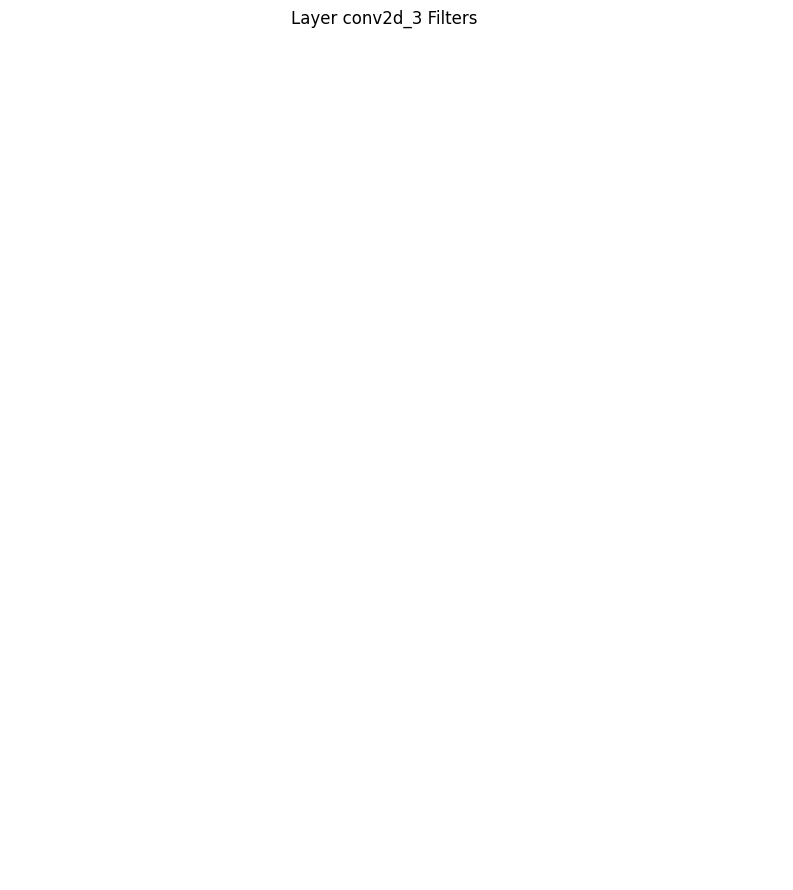

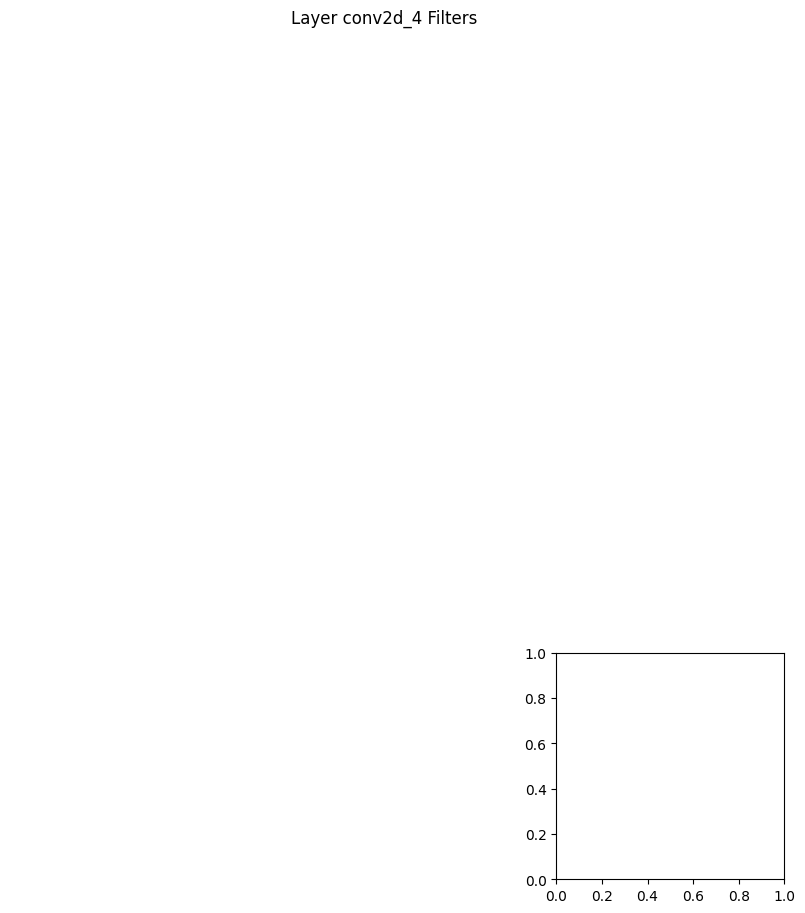

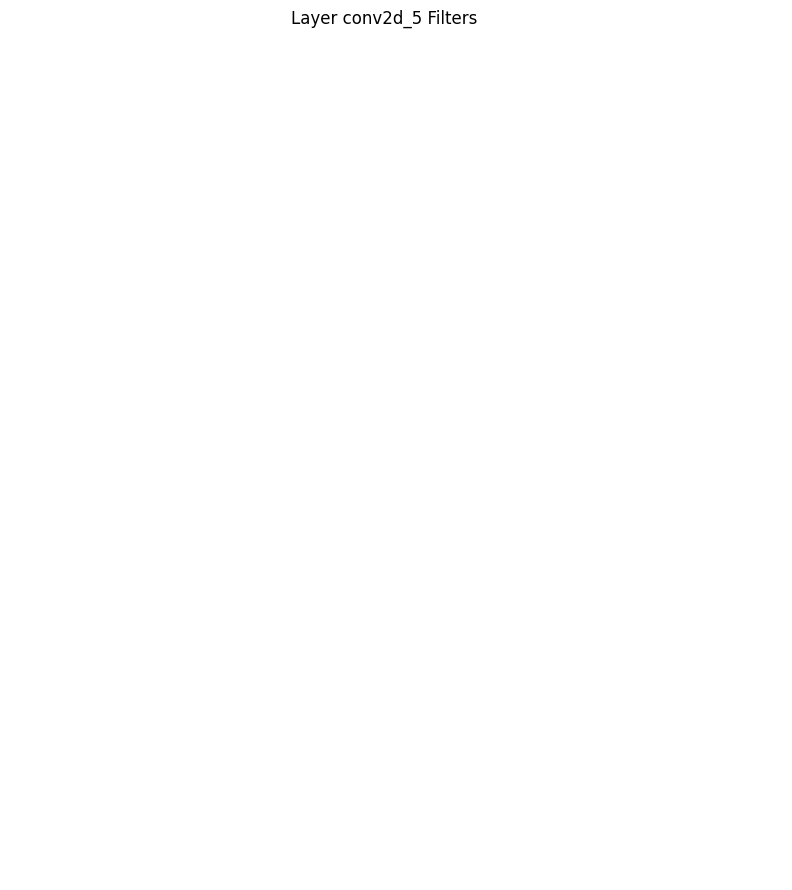

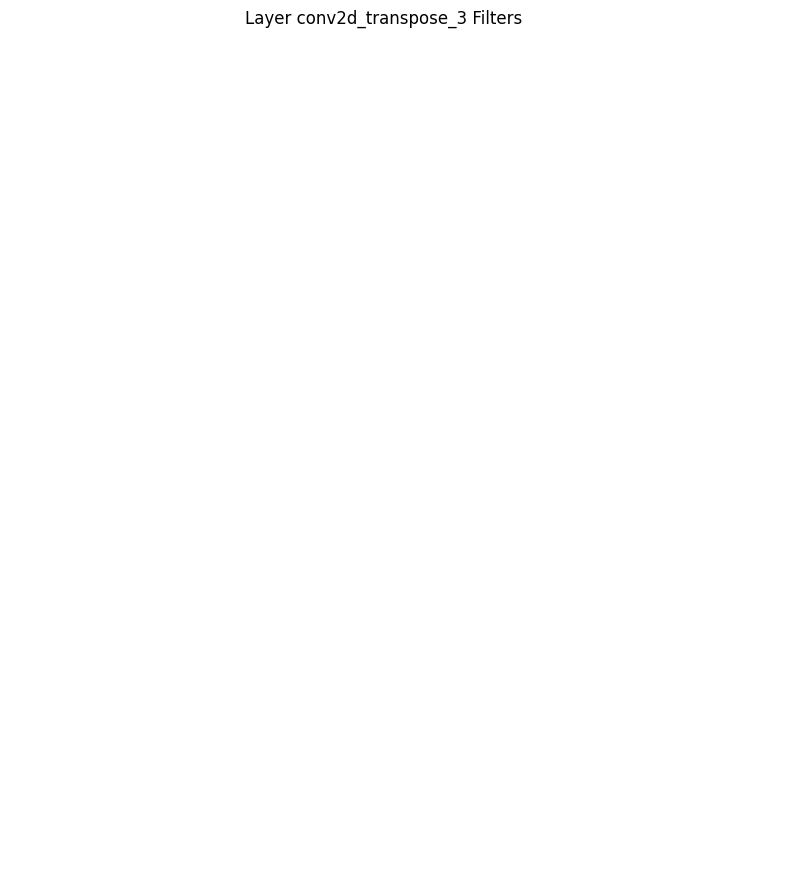

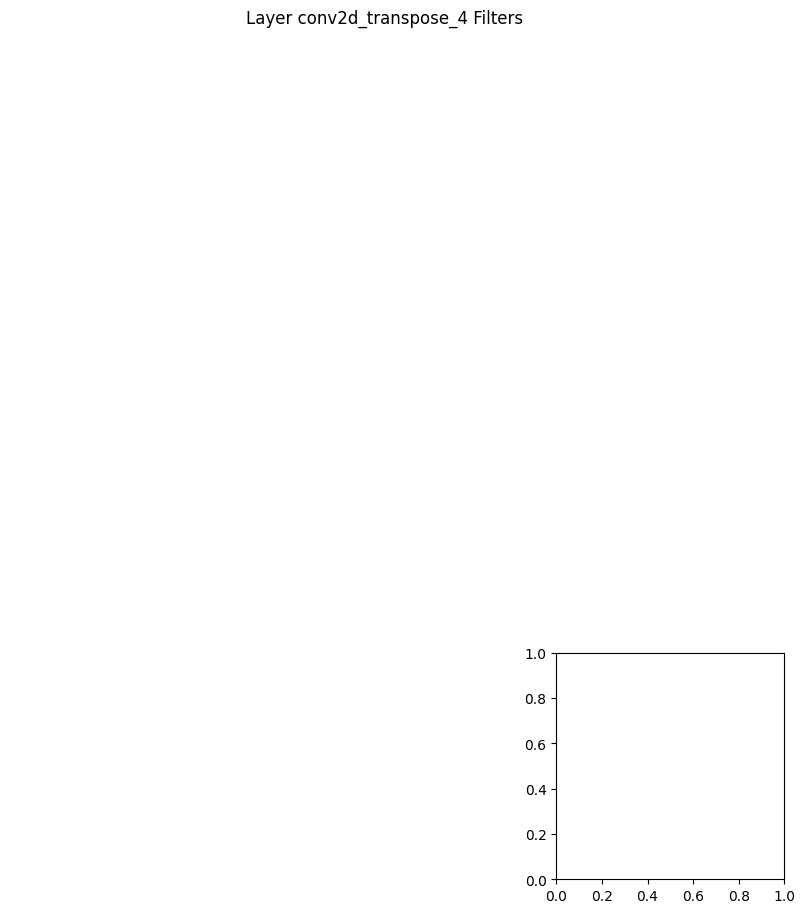

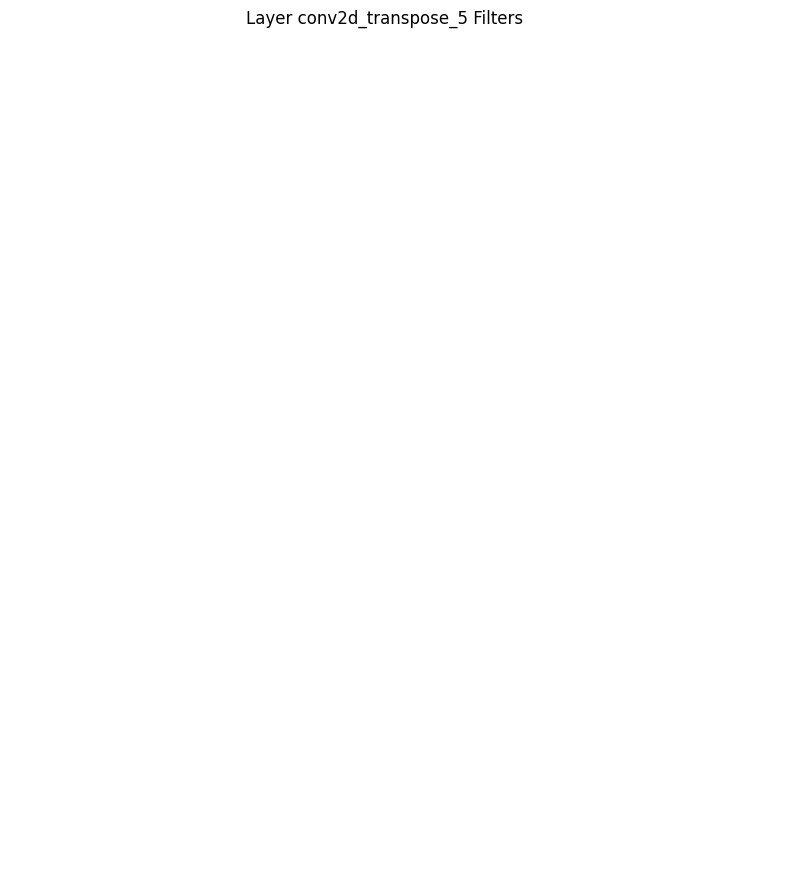

In [16]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Directory to save the filter images
save_dir = "/content/drive/MyDrive/IITB/Magntic_Image/11x11_filter_images"
os.makedirs(save_dir, exist_ok=True)

# Load the saved model
model_path = "/content/drive/MyDrive/IITB/Magntic_Image/model/11x11_padding_v2_autoencoder_model.h5"
loaded_model = load_model(model_path)

# Display and save the filters at each layer
for layer in loaded_model.layers:
    if hasattr(layer, 'filters'):
        filters = layer.get_weights()[0]
        num_filters = filters.shape[3]
        filter_size = filters.shape[0]

        # Create a grid to display the filters
        grid_size = int(np.ceil(np.sqrt(num_filters)))
        fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))

        # Display each filter in the grid
        for i in range(num_filters):
            row = i // grid_size
            col = i % grid_size
            axs[row, col].imshow(filters[:, :, 0, i], cmap='gray')
            axs[row, col].axis('off')

        plt.suptitle(f"Layer {layer.name} Filters")
        plt.savefig(os.path.join(save_dir, f"Layer_{layer.name}_Filters.png"), bbox_inches='tight')
        plt.show()
        plt.close()
